In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Group03.zip

Archive:  /content/drive/MyDrive/Group03.zip
   creating: Group03/
   creating: Group03/Classification/
   creating: Group03/Classification/Image_Group03/
   creating: Group03/Classification/Image_Group03/test/
   creating: Group03/Classification/Image_Group03/test/botanical_garden/
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaestfykdspfjxqz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aajgmzsvuhejexcq.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaqfmkvdwukffrst.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acbeefkxpymwevpk.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acghfkorvlqvksjz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackdwnmnaehpqggg.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackzydggopidfvhd.jpg  
  inflating: Group03/Cl

In [3]:
import pandas as pd
import numpy as np

In [4]:
NL_data = pd.read_csv('/content/Group03/Classification/NLS_Group03.txt', sep=" ", header=None)[1:]
c1 = NL_data.iloc[:,0:2].astype(np.float)

class1,class2,class3 = c1[0:300],c1[300:800],c1[800:1800]
train1,train2,train3=class1[0:180],class2[0:300],class3[0:600]
valid1,valid2,valid3  = class1[180:240],class2[300:400],class3[600:800]
test1,test2,test3 = class1[240:300],class2[400:500],class3[800:1000] 



In [5]:
import matplotlib.pyplot as plt


In [6]:
import numpy as np
from random import random


class MLP(object):
    

    def __init__(self, input=3, hidden=[3, 3], output=2):
        

        self.input = input
        self.hidden = hidden
        self.output = output
        self.e = []
        layers = [input] + hidden + [output]

        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        der = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            der.append(d)
        self.der = der

        activ = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activ.append(a)
        self.activ = activ


    def forward_propagate(self, inputs):
        

        activ = inputs
        

        self.activ[0] = activ

        for i, w in enumerate(self.weights):
            net_inputs = np.dot(activ, w)

            activ = self._sigmoid(net_inputs)


            self.activ[i + 1] = activ

        return activ


    def back_propagate(self, error):
       

        for i in reversed(range(len(self.der))):

            activ = self.activ[i+1]

            delta = error * self._sigmoid_derivative(activ)

            delta_re = delta.reshape(delta.shape[0], -1).T

            current_activ = self.activ[i]

            current_activ = current_activ.reshape(current_activ.shape[0],-1)

            self.der[i] = np.dot(current_activ, delta_re)

            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets, epochs, learning_rate):
        
        for i in range(epochs):
            sum_errors = 0

            for j, input in enumerate(inputs):
                target = targets[j]

                output = self.forward_propagate(input)

                error = target - output

                self.back_propagate(error)

                
                self.gradient_descent(learning_rate)

                sum_errors += self._mse(target, output)

           
            self.e.append(sum_errors / len(inputs))
        

    


    def _sigmoid(self, x):
        

        y = 1.0 / (1 + np.exp(-x))
        return y

    def gradient_descent(self, learningRate=1):
       
        for i in range(len(self.weights)):
            weights = self.weights[i]
            der = self.der[i]
            weights += der * learningRate



    def _sigmoid_derivative(self, x):
       
        return x * (1.0 - x)


    def _mse(self, target, output):
        
        return np.average((target - output) ** 2)



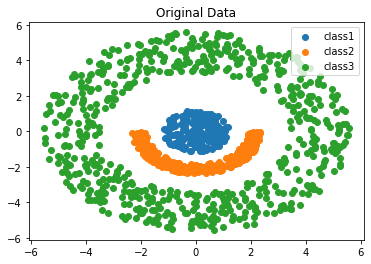

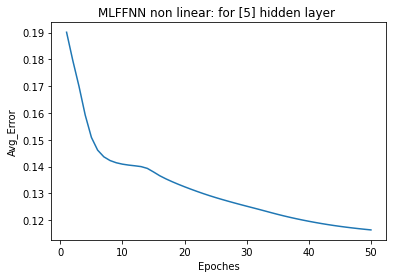

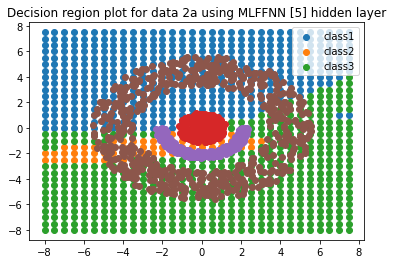

25 30 5
7 41 52
80 12 108
Accuracy: 0.4833333333333333


In [9]:
set1_y = np.zeros(shape = 180)
set2_y = np.ones(shape = 300) 
X1=np.concatenate([train1,train2])
y1=np.concatenate([set1_y,set2_y]) 
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1],label='class1')
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1],label='class2')
plt.scatter(train3.iloc[:, 0]import numpy as np
from random import random


class MLP(object):
    

    def __init__(self, input=3, hidden=[3, 3], output=2):
        

        self.input = input
        self.hidden = hidden
        self.output = output
        self.e = []
        layers = [input] + hidden + [output]

        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        der = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            der.append(d)
        self.der = der

        activ = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activ.append(a)
        self.activ = activ


    def forward_propagate(self, inputs):
        

        activ = inputs
        

        self.activ[0] = activ

        for i, w in enumerate(self.weights):
            net_inputs = np.dot(activ, w)

            activ = self._sigmoid(net_inputs)


            self.activ[i + 1] = activ

        return activ


    def back_propagate(self, error):
       

        for i in reversed(range(len(self.der))):

            activ = self.activ[i+1]

            delta = error * self._sigmoid_derivative(activ)

            delta_re = delta.reshape(delta.shape[0], -1).T

            current_activ = self.activ[i]

            current_activ = current_activ.reshape(current_activ.shape[0],-1)

            self.der[i] = np.dot(current_activ, delta_re)

            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets, epochs, learning_rate):
        
        for i in range(epochs):
            sum_errors = 0

            for j, input in enumerate(inputs):
                target = targets[j]

                output = self.forward_propagate(input)

                error = target - output

                self.back_propagate(error)

                
                self.gradient_descent(learning_rate)

                sum_errors += self._mse(target, output)

           
            self.e.append(sum_errors / len(inputs))
        

    


    def _sigmoid(self, x):
        

        y = 1.0 / (1 + np.exp(-x))
        return y

    def gradient_descent(self, learningRate=1):
       
        for i in range(len(self.weights)):
            weights = self.weights[i]
            der = self.der[i]
            weights += der * learningRate



    def _sigmoid_derivative(self, x):
       
        return x * (1.0 - x)


    def _mse(self, target, output):
        
        return np.average((target - output) ** 2)

, train3.iloc[:, 1],label='class3')
plt.title("Original Data")
plt.legend()
plt.show() 

X2=np.concatenate([train2,train3])
set11_y = np.zeros(shape = 300)
set22_y = np.ones(shape = 600)
y2=np.concatenate([set11_y,set22_y]) 


X3=np.concatenate([train3,train1])
y3=np.concatenate([np.zeros(shape = len(train3)),np.ones(shape = len(train1))]) 

model11 = MLP(2, [5], 1)
model11.train(X1, y1, 50, 0.1)

model22 = MLP(2, [5], 1)
model22.train(X2, y2, 50, 0.1)

model33 = MLP(2, [5], 1)
model33.train(X3, y3, 50, 0.1)




error1 = model11.e
error2 = model22.e
error3= model33.e 
epoch = [i for i in range(1,51)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epochs")
plt.ylabel("Avg_Error")
plt.title("MLFFNN non linear: for [5] hidden layer ")
plt.show()



x1grid = np.arange(-8, 8, 0.5)
x2grid = np.arange(-8, 8, 0.5)

# x1grid
cl1 =[]
cl2=[]
cl3=[]

for i in range(len(x1grid)):
  for j in range(len(x2grid)):
    cl = findclass(x1grid[i],x2grid[j])
    if (cl==1):cl1.append([x1grid[i],x2grid[j]])
    if (cl==2):cl2.append([x1grid[i],x2grid[j]])
    if (cl==3):cl3.append([x1grid[i],x2grid[j]]) 




cl1= pd.DataFrame(cl1)
cl2= pd.DataFrame(cl2)
cl3= pd.DataFrame(cl3)
plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1',alpha=1)
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2',alpha=1)
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3',alpha=1)
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1])
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1])
plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1])
plt.title("Decision region plot for data 2a using MLFFNN [5] hidden layer")

plt.legend()
plt.show()


predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]
for i in range(3):
  print(*cm[i])



inAccuracy = (cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1])/(cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1]+cm[0][0]+cm[1][1]+cm[2][2])
print("Accuracy:",1-inAccuracy)











[Text(33.0, 0.5, 'Actual class'), Text(0.5, 15.0, 'Predicted class')]

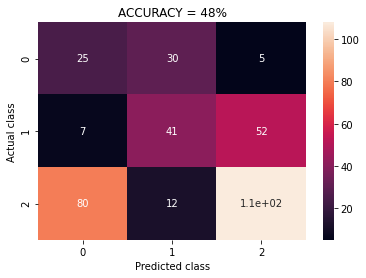

In [10]:
import seaborn as sns
plt.title("ACCURACY = 48%",)
# plt.xlabel("Predicted class")
# plt.ylabel("Actual class")

ax = sns.heatmap(cm, annot=True)

ax.set(xlabel="Predicted class", ylabel = "Actual class")

# plt.show()

In [8]:
def findclass(x1,x2): 
  one=0
  two=0
  three=0
  # test = [test3.iloc[0][0],test3.iloc[0][1]]
  test = [x1,x2]
  val = model11.forward_propagate(test)
  one+=(1-val[0])
  two+=val[0]
  val = model22.forward_propagate(test)
  two+=(1-val[0])
  three+=val[0]
  val = model33.forward_propagate(test)
  three+=(1-val[0])
  one+=val[0]
  if(max(one,two,three)==one):return 1;
  if(max(one,two,three)==two):return 2;
  if(max(one,two,three)==three):return 3;






Text(0.5, 1.0, 'MLFFNN non linear: for [5] hidden layer ')

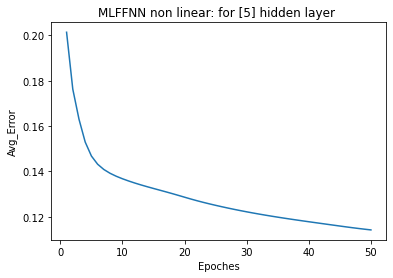

In [ ]:


error1 = model11.e
error2 = model22.e
error3= model33.e 
epoch = [i for i in range(1,51)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epoches")
plt.ylabel("Avg_Error")
plt.title("MLFFNN non linear: for [5] hidden layer ")


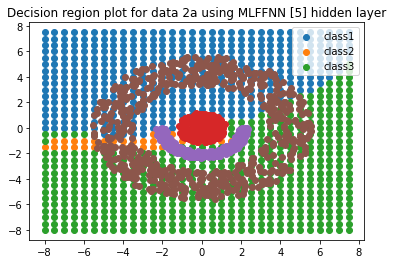

Expeiment 2


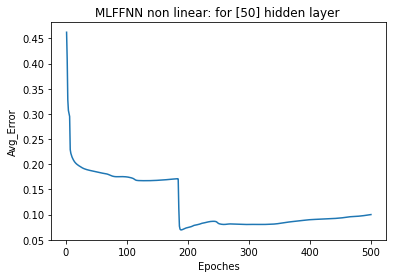

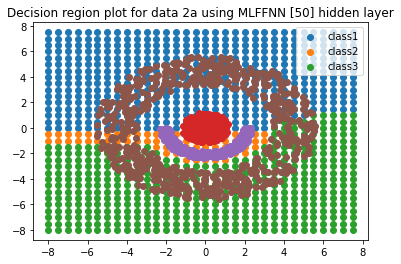

36 20 4
3 97 0
93 7 100
Accuracy: 0.6472222222222221


In [11]:
set1_y = np.zeros(shape = 180)
set2_y = np.ones(shape = 300) 
X1=np.concatenate([train1,train2])
y1=np.concatenate([set1_y,set2_y]) 
 

X2=np.concatenate([train2,train3])
set11_y = np.zeros(shape = 300)
set22_y = np.ones(shape = 600)
y2=np.concatenate([set11_y,set22_y]) 


X3=np.concatenate([train3,train1])
y3=np.concatenate([np.zeros(shape = len(train3)),np.ones(shape = len(train1))]) 

model11 = MLP(2, [50], 1)
model11.train(X1, y1, 500, 0.1)

model22 = MLP(2, [50], 1)
model22.train(X2, y2, 500, 0.1)

model33 = MLP(2, [50], 1)
model33.train(X3, y3, 500, 0.1)




error1 = model11.e
error2 = model22.e
error3= model33.e 
epoch = [i for i in range(1,501)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epoches")
plt.ylabel("Avg_Error")
plt.title("MLFFNN non linear: for [50] hidden layer ")

plt.show()



x1grid = np.arange(-8, 8, 0.5)
x2grid = np.arange(-8, 8, 0.5)

# x1grid
cl1 =[]
cl2=[]
cl3=[]

for i in range(len(x1grid)):
  for j in range(len(x2grid)):
    cl = findclass(x1grid[i],x2grid[j])
    if (cl==1):cl1.append([x1grid[i],x2grid[j]])
    if (cl==2):cl2.append([x1grid[i],x2grid[j]])
    if (cl==3):cl3.append([x1grid[i],x2grid[j]]) 




cl1= pd.DataFrame(cl1)
cl2= pd.DataFrame(cl2)
cl3= pd.DataFrame(cl3)
plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1',alpha=1)
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2',alpha=1)
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3',alpha=1)
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1])
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1])
plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1])
plt.title("Decision region plot for data 2a using MLFFNN [50] hidden layer")

plt.legend()
plt.show()

# Accuracy and confsion matrix


predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]
for i in range(3):
  print(*cm[i])


inAccuracy = (cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1])/(cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1]+cm[0][0]+cm[1][1]+cm[2][2])
print("Accuracy:",1-inAccuracy)







[Text(33.0, 0.5, 'Actual class'), Text(0.5, 15.0, 'Predicted class')]

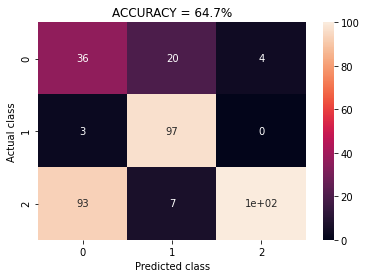

In [12]:
import seaborn as sns
plt.title("ACCURACY = 64.7%",)
# plt.xlabel("Predicted class")
# plt.ylabel("Actual class")

ax = sns.heatmap(cm, annot=True)

ax.set(xlabel="Predicted class", ylabel = "Actual class")

# plt.show()

In [13]:
predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]
for i in range(3):
  print(*cm[i])



inAccuracy = (cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1])/(cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1]+cm[0][0]+cm[1][1]+cm[2][2])
print("Accuracy:",1-inAccuracy)


36 20 4
3 97 0
93 7 100
Accuracy: 0.6472222222222221


In [ ]:
Accuracy = (cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1])/(cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1]+cm[0][0]+cm[1][1]+cm[2][2])
Accuracy

0.3611111111111111

Experiment 3


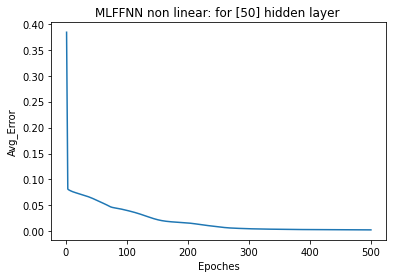

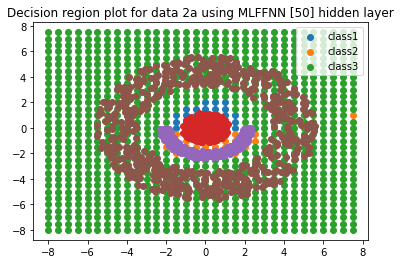

60 0 0
0 96 4
0 0 200
Accuracy: 0.9888888888888889


In [14]:
set1_y = np.zeros(shape = 180)
set2_y = np.ones(shape = 300) 
X1=np.concatenate([train1,train2])
y1=np.concatenate([set1_y,set2_y]) 
 

X2=np.concatenate([train2,train3])
set11_y = np.zeros(shape = 300)
set22_y = np.ones(shape = 600)
y2=np.concatenate([set11_y,set22_y]) 


X3=np.concatenate([train3,train1])
y3=np.concatenate([np.zeros(shape = len(train3)),np.ones(shape = len(train1))]) 

model11 = MLP(2, [15,15], 1)
model11.train(X1, y1, 500, 0.1)

model22 = MLP(2, [15,15], 1)
model22.train(X2, y2, 500, 0.1)

model33 = MLP(2, [15,15], 1)
model33.train(X3, y3, 500, 0.1)




error1 = model11.e
error2 = model22.e
error3= model33.e 
epoch = [i for i in range(1,501)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epoches")
plt.ylabel("Avg_Error")
plt.title("MLFFNN non linear: for [50] hidden layer ")

plt.show()



x1grid = np.arange(-8, 8, 0.5)
x2grid = np.arange(-8, 8, 0.5)

# x1grid
cl1 =[]
cl2=[]
cl3=[]

for i in range(len(x1grid)):
  for j in range(len(x2grid)):
    cl = findclass(x1grid[i],x2grid[j])
    if (cl==1):cl1.append([x1grid[i],x2grid[j]])
    if (cl==2):cl2.append([x1grid[i],x2grid[j]])
    if (cl==3):cl3.append([x1grid[i],x2grid[j]]) 




cl1= pd.DataFrame(cl1)
cl2= pd.DataFrame(cl2)
cl3= pd.DataFrame(cl3)
plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1',alpha=1)
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2',alpha=1)
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3',alpha=1)
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1])
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1])
plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1])
plt.title("Decision region plot for data 2a using MLFFNN [50] hidden layer")

plt.legend()
plt.show()

# Accuracy and confsion matrix


predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]
for i in range(3):
  print(*cm[i])


inAccuracy = (cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1])/(cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1]+cm[0][0]+cm[1][1]+cm[2][2])
print("Accuracy:",1-inAccuracy)




[Text(33.0, 0.5, 'Actual class'), Text(0.5, 15.0, 'Predicted class')]

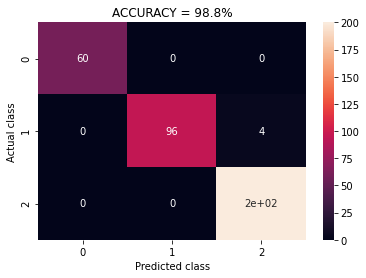

In [15]:
import seaborn as sns
plt.title("ACCURACY = 98.8%",)
# plt.xlabel("Predicted class")
# plt.ylabel("Actual class")

ax = sns.heatmap(cm, annot=True)

ax.set(xlabel="Predicted class", ylabel = "Actual class")

# plt.show()